In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Load the data
sample_id = "IMMUNEX006"
adata = sc.read(f"/scratch/IMMUNEX/segmentation/bin2cell/bin2cell_output/{sample_id}/adata_processed.h5ad")
adata.raw = adata
adata.uns['sample_id'] = sample_id

# Load the metadata
metadata = pd.read_csv("/scratch/IMMUNEX/data/VisiumHD_18_2024_NSCLC.csv")
display(metadata.head())

metadata_sample = metadata[metadata['Sample_code'] == sample_id]
adata.uns["sample_metadata"] = metadata_sample.iloc[0].to_dict()

display(adata.obs) # Display the first few rows of the observation data (cell metadata)

/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


,Manip_Visium,DV200,HE_image_name,Cytasimage_path,TLS_status,area,slide,Average_fragment_size,Concentratio_pg_per_µL,Concentration finale (ng/µL),Final_concentration_nM,Dual _Index,Volume_available_µL,Volume_send_µL,Sample_code,Position_on_the_plaque,Sea_Dual_Index_TS_Set_A
0,NJ285,45,IMMUNEX001_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ285-07-11-2024_H1-X9BBRQR_17...,High,A1,H1-X9BBRQR,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"
1,NJ285,47,IMMUNEX002_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ285-07-11-2024_H1-X9BBRQR_17...,Low,D1,H1-X9BBRQR,252,54.7,2.73,16.4,H3,around_24,22,IMMUNEX002,B1,"SI-TS-H3,AAACAGGAGA,TCGGCCCTTG,CAAGGGCCGA"
2,NJ289,32,IMMUNEX003_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ289-14112024_H1-ZVB979D_1731...,High,A1,H1-ZVB979D,250,80.1,4.00,24.3,A4,around_24,22,IMMUNEX003,C1,"SI-TS-A4,GCTACCCGGT,ATGTAATGGA,TCCATTACAT"
3,NJ289,43,IMMUNEX004_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ289-14112024_H1-ZVB979D_1731...,Low,D1,H1-ZVB979D,251,62.3,3.11,18.8,B4,around_24,22,IMMUNEX004,D1,"SI-TS-B4,ACCCGCTCGA,GTCACCCGTA,TACGGGTGAC"
4,NJ291,48,IMMUNEX005_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ291-27nov2024_H1-Z6HWYV8_173...,High,A1,H1-Z6HWYV8,260,468.6,23.40,136.7,G4,around_24,22,IMMUNEX005,E1,"SI-TS-G4,CATTTACCGT,CACCTGTAAA,TTTACAGGTG"


,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source
s_002um_00658_01498-1,1,658,1498,8.0,0.286223,13.738693,0,0,0,0,none
s_002um_02587_02503-1,1,2587,2503,16.0,0.479724,23.026748,0,153854,28129,153854,primary
s_002um_02498_02808-1,1,2498,2808,5.0,0.217142,10.422836,0,150726,0,150726,primary
s_002um_00952_00136-1,1,952,136,1.0,0.021579,1.035771,0,88977,0,88977,primary
s_002um_00564_00910-1,1,564,910,5.0,0.214505,10.296229,38041,38041,8896,38041,primary
...,...,...,...,...,...,...,...,...,...,...,...
s_002um_03318_03089-1,1,3318,3089,13.0,0.376346,18.064600,192658,192658,0,192658,primary
s_002um_00212_00415-1,1,212,415,18.0,0.362565,17.403112,0,42350,3586,42350,primary
s_002um_03062_00964-1,1,3062,964,8.0,0.222588,10.684209,0,228289,34353,228289,primary
s_002um_00504_01845-1,1,504,1845,31.0,0.770302,36.974505,0,0,6515,0,none


In [4]:
# Set the default figure size
sc.settings.figsize = (4, 4)
# Set the default color map
sc.settings.color_map = 'viridis'
# Set the default figure export folder
figure_path =  "../results/figures/{}/".format(adata.uns['sample_id']) 

if not os.path.exists(figure_path):
    os.makedirs(figure_path)
sc.settings.figdir = figure_path

# Annotate mitochondrial genes and calculate QC metrics
adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

print('exporting plot')
# Visualize QC metrics before filtering
# sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], stripplot=False , jitter=0.4, multi_panel=True,show = True, save="_qc_before_violin.png")
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',show = True, save="_qc_before_scatter.png")


IOStream.flush timed out


exporting plot


In [5]:
intermediate_path = "../data/intermediate/{}/".format(adata.uns['sample_id'])
adata_path = f"{intermediate_path}/adatas/"
# setting the filtering parameters
min_genes = 0 # not a viable cell, likely background.
max_genes = 100 #  problematic barcodes
min_counts = 1 # empty droplets or background noise.
max_counts = 100 # potential doublets
max_pct_counts_mt = 20

# filtering the data   
adata_filtered = adata[
    (adata.obs['n_genes_by_counts'] < max_genes) &
    (adata.obs['total_counts'] > min_counts) &
    (adata.obs['total_counts'] < max_counts) &
    (adata.obs['pct_counts_mt'] < max_pct_counts_mt)
    ,:
]

print(adata.shape)
print(adata_filtered.shape)



(9738037, 18396)
(9469734, 18396)


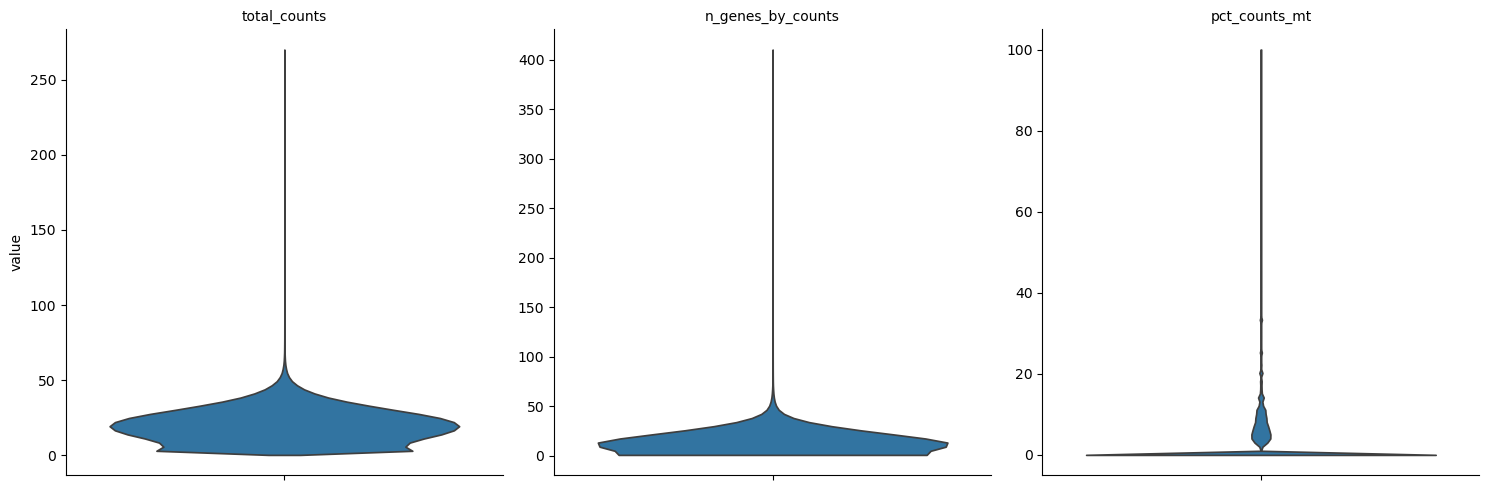

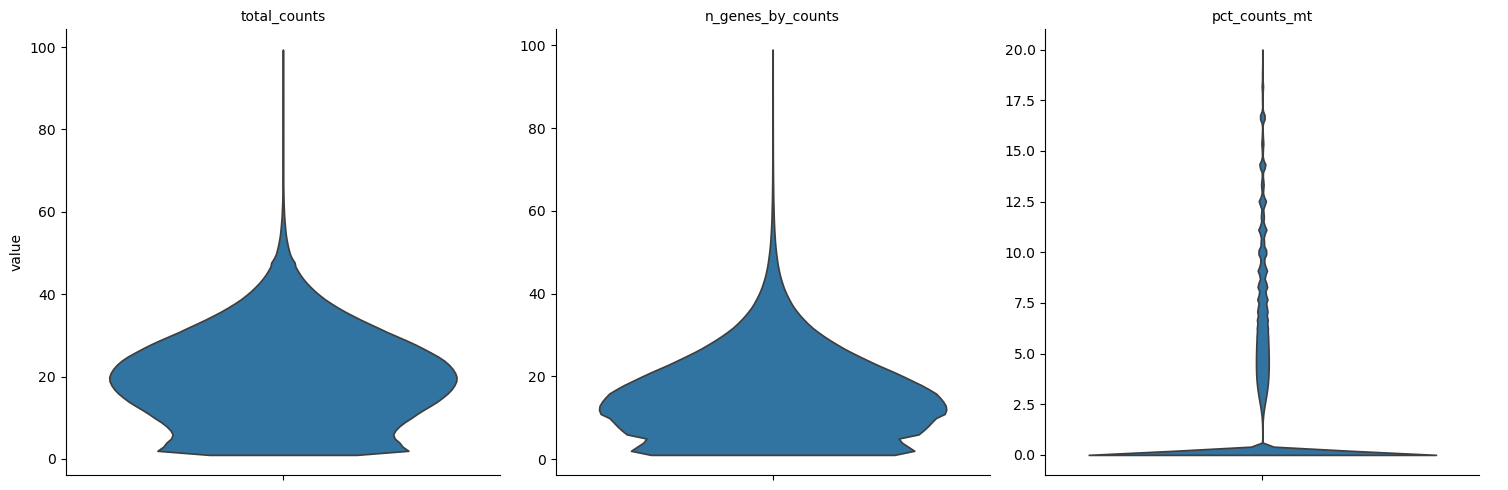

In [6]:
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], stripplot=False , jitter=0.4, multi_panel=True,show = True, save="_qc_before_violin.png")
sc.pl.violin(adata_filtered, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], multi_panel=True,show = True, save="_qc_after_violin.png", stripplot=False )

# Save the filtered data in CSV format
# filtered_data_csv = adata_filtered.to_df().reset_index()
# Save the filtered data
# adata_filtered.write_h5ad(os.path.join(adata_path, 'filtered_data.h5ad'))



Cropped all cells: (4852, 18396)
Cropped filtered cells: (4741, 18396)


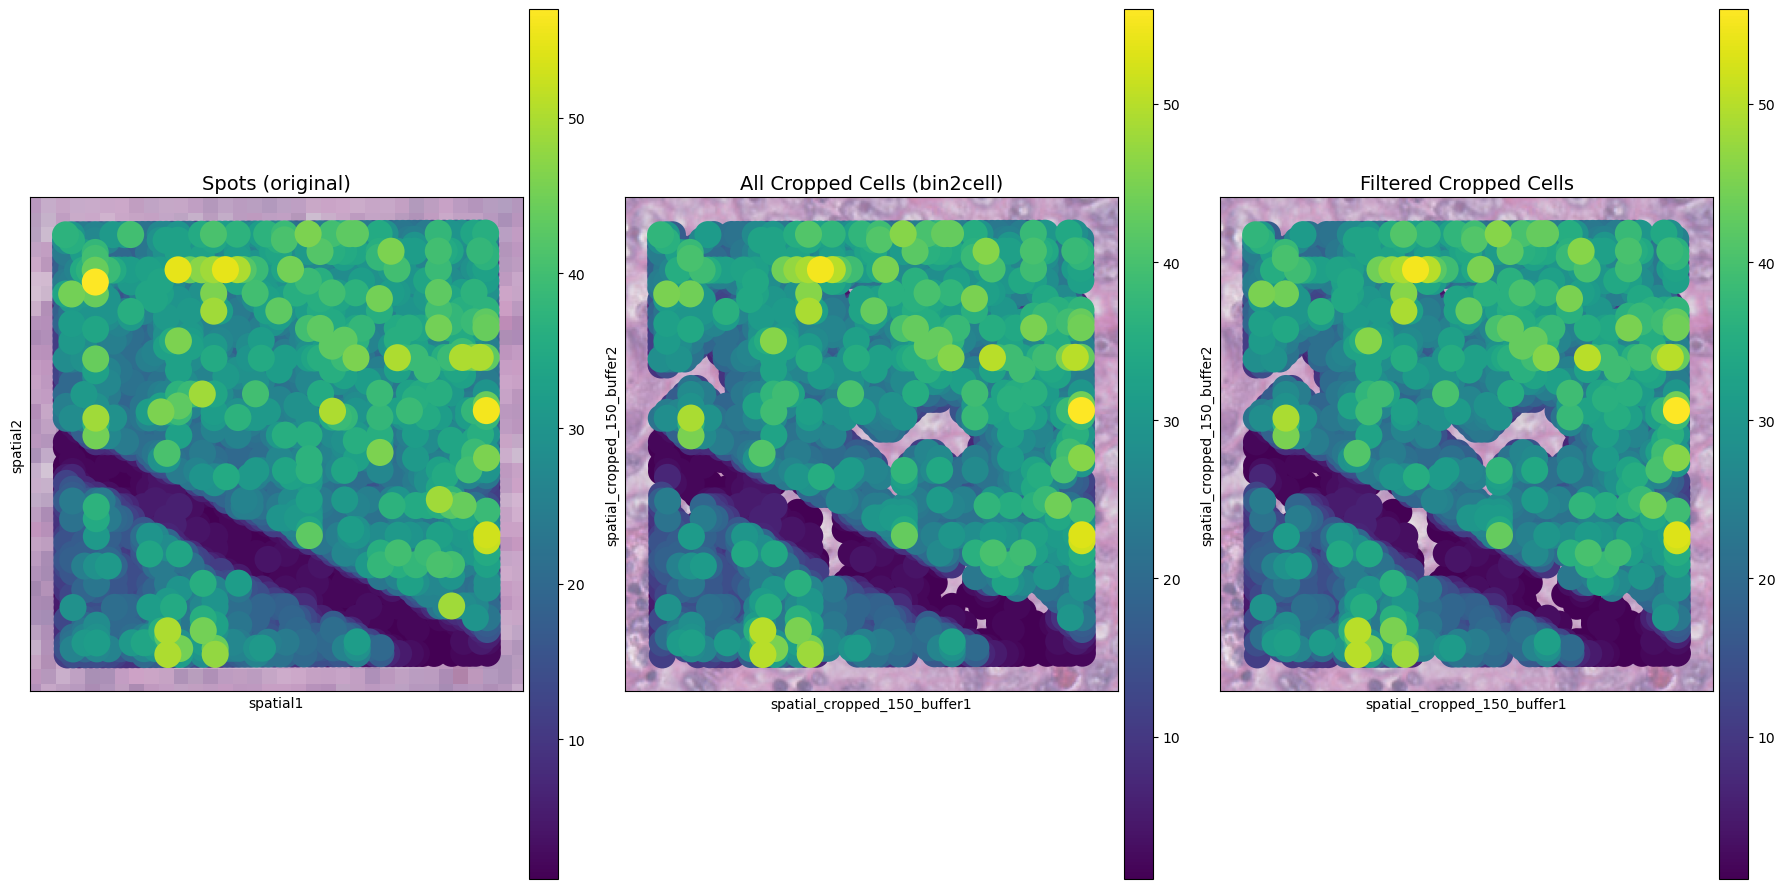

In [7]:
# Set the margin (buffer) around the region of interest
buffer = 150  # in pixels
spatial_key = "spatial"  # use spatial key from full adata

# Use spatial coordinates from the full dataset, not filtered
coords = adata.obsm[spatial_key]
x_min, x_max = np.percentile(coords[:, 0], [80, 80.1])
y_min, y_max = np.percentile(coords[:, 1], [40, 40.1])

# Add buffer
x_min -= buffer
x_max += buffer
y_min -= buffer
y_max += buffer

# Create mask using full adata
mask = (
    (coords[:, 0] >= x_min) & (coords[:, 0] <= x_max) &
    (coords[:, 1] >= y_min) & (coords[:, 1] <= y_max)
)

# Subset the full adata to get the cropped data
cdata = adata[mask].copy()

# Then, intersect with the QC-filtered cells
cdata_filtered = cdata[cdata.obs_names.isin(adata_filtered.obs_names)].copy()

# Optional: Print shapes
print("Cropped all cells:", cdata.shape)
print("Cropped filtered cells:", cdata_filtered.shape)



fig, axs = plt.subplots(1, 3, figsize=(18, 9))

# Plot using original spots (pre-segmentation)
sc.pl.spatial(
    cdata, 
    color="n_counts", 
    basis="spatial", 
    img_key="hires", 
    alpha_img=0.6,
    spot_size=20,
    ax=axs[0],
    show=False,
)
axs[0].set_title("Spots (original)", fontsize=14)


sc.pl.spatial(
    cdata[cdata.obs['labels_joint'] > 0], 
    color="n_counts", 
    basis="spatial_cropped_150_buffer", 
    img_key="0.6_mpp_150_buffer", 
    alpha_img=0.6,
    spot_size=20,
    ax=axs[1],
    show=False
)
axs[1].set_title("All Cropped Cells (bin2cell)", fontsize=14)


sc.pl.spatial(
    cdata_filtered[cdata_filtered.obs['labels_joint'] > 0], 
    color="n_counts", 
    basis="spatial_cropped_150_buffer", 
    img_key="0.6_mpp_150_buffer", 
    alpha_img=0.6,
    spot_size=20,
    ax=axs[2],
    show=False
)
axs[2].set_title("Filtered Cropped Cells", fontsize=14)

plt.tight_layout()
plt.show()


/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


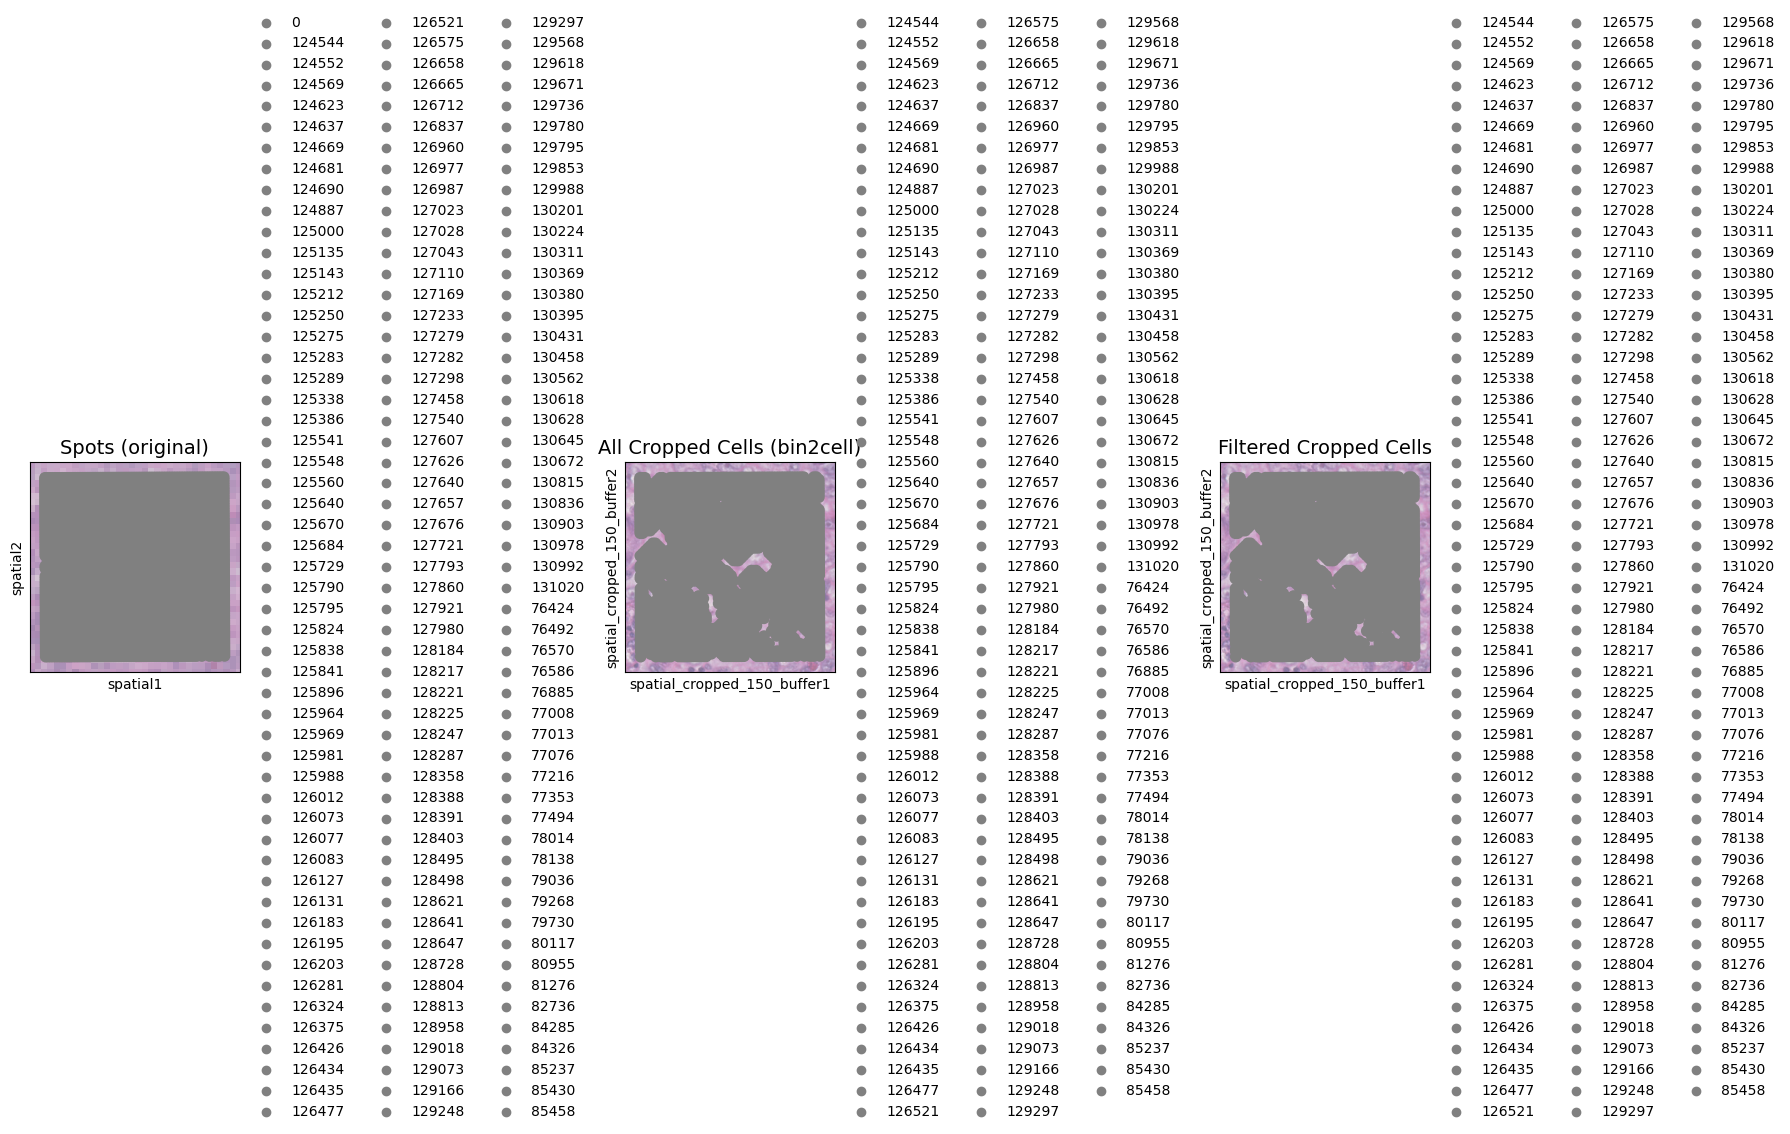

In [8]:


fig, axs = plt.subplots(1, 3, figsize=(18, 9))

cdata.obs['cells'] = cdata.obs['labels_joint'].astype(str).astype('category')
cdata_filtered.obs['cells'] = cdata_filtered.obs['labels_joint'].astype(str).astype('category')

# Plot using original spots (pre-segmentation)
sc.pl.spatial(
    cdata, 
    color="cells", 
    basis="spatial", 
    img_key="hires", 
    alpha_img=0.6,
    spot_size=20,
    ax=axs[0],
    show=False,
)
axs[0].set_title("Spots (original)", fontsize=14)


sc.pl.spatial(
    cdata[cdata.obs['labels_joint'] > 0], 
    color="cells", 
    basis="spatial_cropped_150_buffer", 
    img_key="0.6_mpp_150_buffer", 
    alpha_img=0.6,
    spot_size=20,
    ax=axs[1],
    show=False
)
axs[1].set_title("All Cropped Cells (bin2cell)", fontsize=14)


sc.pl.spatial(
    cdata_filtered[cdata_filtered.obs['labels_joint'] > 0], 
    color="cells", 
    basis="spatial_cropped_150_buffer", 
    img_key="0.6_mpp_150_buffer", 
    alpha_img=0.6,
    spot_size=20,
    ax=axs[2],
    show=False
)
axs[2].set_title("Filtered Cropped Cells", fontsize=14)

plt.tight_layout()
plt.show()

## Group by segmentation

In [11]:
from tqdm import tqdm

adata.obs['cell_id'] = adata.obs['labels_joint'].astype(str)
adata_cells = adata[adata.obs['labels_joint'] > 0].copy()
adata_cells.var['mt'] = adata_cells.var_names.str.upper().str.startswith('MT-')

# Use CSR for efficient row slicing
X = adata_cells.X.tocsr()
cell_ids = adata_cells.obs['cell_id'].values
print('Analysing')

# Map cell_id to integer index
unique_ids, inverse_idx = np.unique(cell_ids, return_inverse=True)
n_cells = len(unique_ids)
n_genes = X.shape[1]
print('Analysing')

# Initialize empty matrix to store the result
# Result will be dense at the end, but small: (n_cells x n_genes)
result = np.zeros((n_cells, n_genes))
print('Analysing')

# Efficient sparse row-by-row summing
for i in tqdm(range(X.shape[0])):
    result[inverse_idx[i]] += X[i].toarray()[0]

# Convert to DataFrame
grouped_expr = pd.DataFrame(result, index=unique_ids, columns=adata_cells.var_names)


Analysing
Analysing
Analysing


100%|███████████████████████████████| 7322516/7322516 [05:30<00:00, 22154.93it/s]


In [12]:
from anndata import AnnData
import scipy.sparse as sp

adata_cells = AnnData(X=sp.csr_matrix(grouped_expr.values))
adata_cells.obs_names = grouped_expr.index
adata_cells.var_names = adata_cells.var_names

# and 'cell_id' is the grouping key used to generate grouped_expr
# 1. Get a mapping from cell_id → average spatial position
cell_coords = adata.obs[['cell_id']].copy()
cell_coords['x'] = adata.obsm['spatial'][:, 0]
cell_coords['y'] = adata.obsm['spatial'][:, 1]

# 2. Average spatial position per cell
mean_coords = cell_coords.groupby('cell_id')[['x', 'y']].mean()

# 3. Match to your grouped_expr.index (cell IDs)
mean_coords = mean_coords.loc[grouped_expr.index]

# 4. Assign to obsm
adata_cells.obsm['spatial'] = mean_coords.values

# Copy the spatial dictionary to cdata
library_id = list(adata.uns['spatial'].keys())[0]
adata_cells.uns['spatial'] = {
    library_id: adata.uns['spatial'][library_id]
}

# Fix gene names
adata_cells.var_names = adata.var_names.copy()
adata_cells.var = adata.var.copy()  # optional: copy all gene metadata
adata_cells.var_names_make_unique()  # ensures no duplicate names

adata_cells

AnnData object with n_obs × n_vars = 235127 × 18396
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

### QC per cell

Before filtering: 235127 cells
After filtering: 217502 cells
Average UMI per spot: 19.03
Average UMI per cell: 512.34
Average UMI per cell_filtered : 477.96


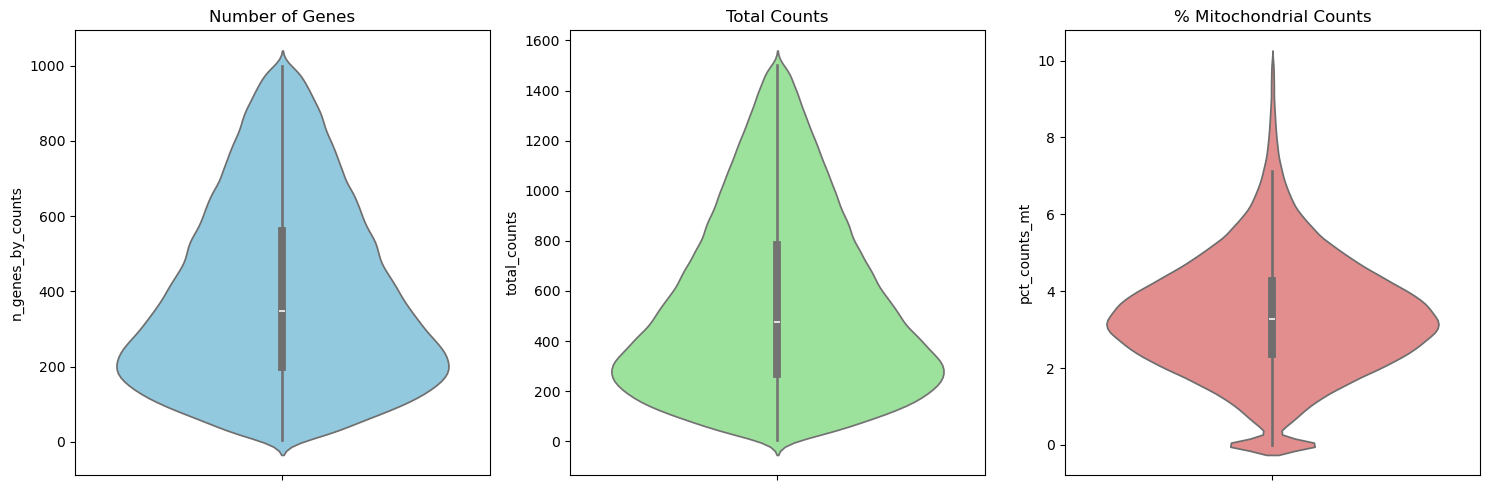

In [13]:
# Annotate mitochondrial genes if not already done
adata_cells.var['mt'] = adata_cells.var_names.str.upper().str.startswith('MT-')

# Calculate QC metrics
import scanpy as sc
sc.pp.calculate_qc_metrics(adata_cells, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Thresholds based on your QC plot
min_genes = 5        # most cells have >5 genes
max_genes = 1000       # upper whisker
min_counts = 5      # remove empty droplets
max_counts = 1500    # safely below extreme outliers
max_mt = 10          # remove cells with >10% mitochondrial content

# Apply filters
cell_filtered = adata_cells[
    (adata_cells.obs['n_genes_by_counts'] > min_genes) &
    (adata_cells.obs['n_genes_by_counts'] < max_genes) &
    (adata_cells.obs['total_counts'] > min_counts) &
    (adata_cells.obs['total_counts'] < max_counts) &
    (adata_cells.obs['pct_counts_mt'] < max_mt)
].copy()

print(f"Before filtering: {adata_cells.n_obs} cells")
print(f"After filtering: {cell_filtered.n_obs} cells")

# Average UMI per spot
avg_umi_spot = adata.obs['total_counts'].median()
print(f"Average UMI per spot: {avg_umi_spot:.2f}")

# Average UMI per cell
avg_umi_cell = adata_cells.obs['total_counts'].median()
print(f"Average UMI per cell: {avg_umi_cell:.2f}")

# Average UMI per cell
avg_umi_cell = cell_filtered.obs['total_counts'].median()
print(f"Average UMI per cell_filtered : {avg_umi_cell:.2f}")


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y=cell_filtered.obs['n_genes_by_counts'], ax=axs[0], color="skyblue")
axs[0].set_title("Number of Genes")

sns.violinplot(y=cell_filtered.obs['total_counts'], ax=axs[1], color="lightgreen")
axs[1].set_title("Total Counts")

sns.violinplot(y=cell_filtered.obs['pct_counts_mt'], ax=axs[2], color="lightcoral")
axs[2].set_title("% Mitochondrial Counts")
# NOTE: MT genes are transcribed only from mitochondria, not the nucleus.

plt.tight_layout()
plt.show()

/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


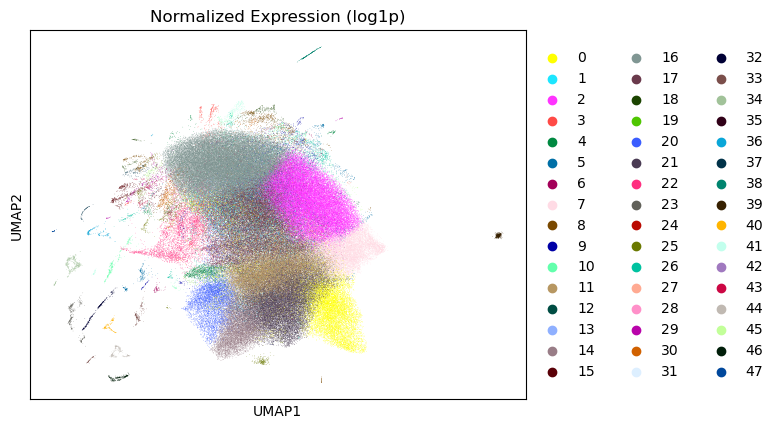

In [14]:
# Normalize & cluster
adata_norm = adata_cells.copy()
sc.pp.normalize_total(adata_norm, target_sum=1e4) # scales the total UMI counts per cell to a fixed value 
sc.pp.log1p(adata_norm) # Makes expression more Gaussian-like
sc.pp.highly_variable_genes(adata_norm, n_top_genes=2000, subset=True) # Focus analysis on informative genes
sc.pp.scale(adata_norm) # Zero-mean, unit-variance transformation

sc.tl.pca(adata_norm, svd_solver='arpack')
sc.pp.neighbors(adata_norm, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata_norm, resolution=1, key_added='leiden_norm', flavor="igraph", n_iterations=2)
sc.tl.umap(adata_norm)

adata_raw = adata_cells.copy()

sc.pl.umap(adata_norm, color='leiden_norm',  title='Normalized Expression (log1p)', show=True)


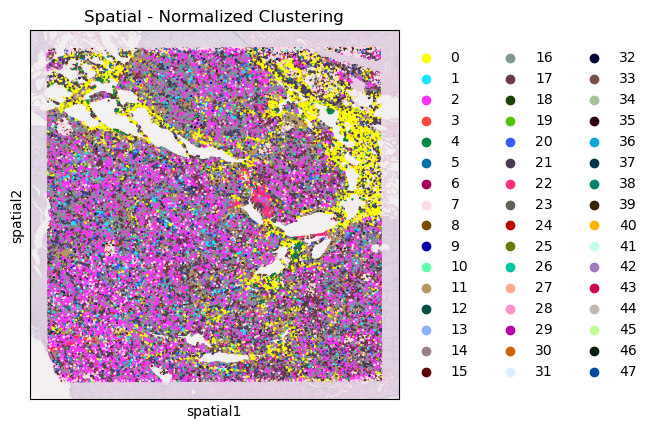

In [15]:

# Plotting Spatial views
sc.pl.spatial(adata_norm, 
              color='leiden_norm', 
              basis='spatial', 
              img_key='hires',
              alpha_img=0.3, 
              alpha=1, 
              spot_size=100,
              cmap = 'jet',
              title='Spatial - Normalized Clustering', 
              show=True)


In [ ]:
## Annotation

import scanpy as sc
import pandas as pd
import celltypist

# Step 1: Load model from cache or download if not present
model_IAH = celltypist.models.Model.load(model='Immune_All_High.pkl')

# Prepare the data for CellTypist (log1p normalized to 10,000 counts per cell)
adata_norm = adata_cells.copy()
sc.pp.normalize_total(adata_norm, target_sum=1e4) # scales the total UMI counts per cell to a fixed value 
sc.pp.log1p(adata_norm) # Makes expression more Gaussian-like
sc.pp.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=30)  # adjust these
sc.tl.leiden(adata, resolution=1)

# Step 2: Annotate the full dataset using CellTypist
predictions = celltypist.annotate(adata_norm, model=model_IAH, majority_voting=True)
adata_IAH = predictions.to_adata()
sc.tl.umap(adata_IAH)


In [ ]:
sc.pl.umap(adata_IAH, color = ['predicted_labels'])
sc.pl.umap(adata_IAH, color = ['majority_voting'])

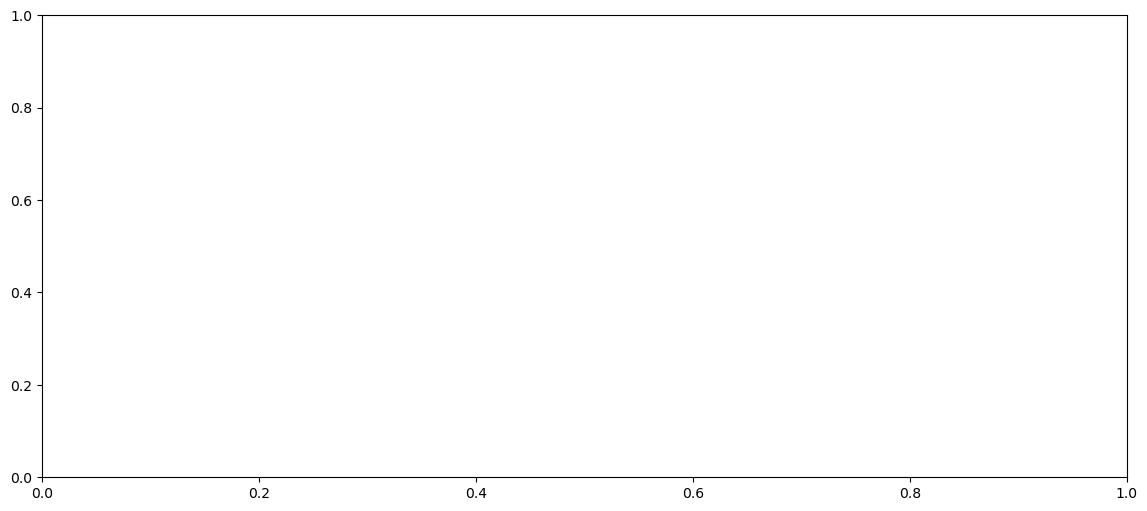

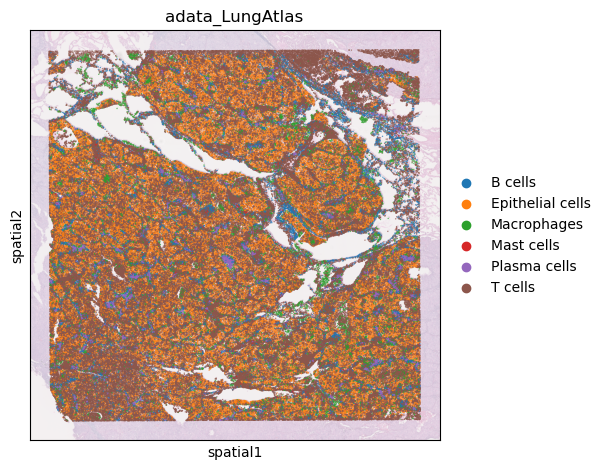

In [26]:
# Plotting Spatial views
fig, axs = plt.subplots(figsize=(14, 6))
sc.pl.spatial(adata_IAH, color='majority_voting', basis='spatial', img_key='hires',
              alpha_img=0.3, alpha=.7, spot_size=55,
              cmap = 'jet',
              title='adata_LungAtlas', show=False)


plt.tight_layout()
plt.show()

### Tunning clustering params

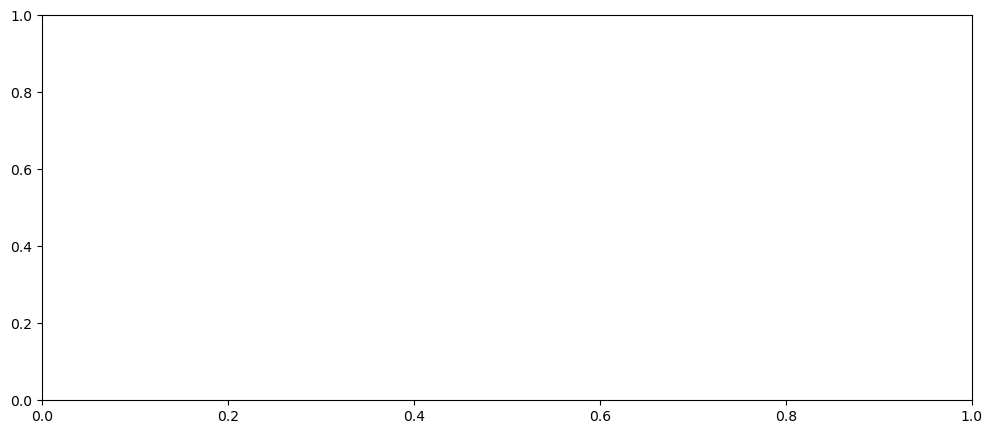

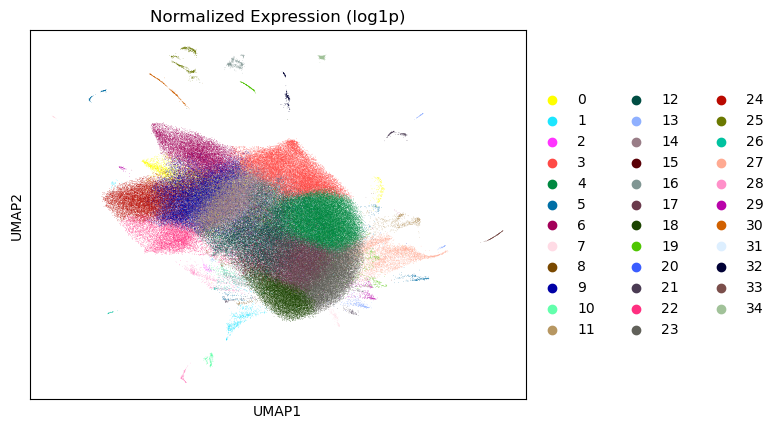

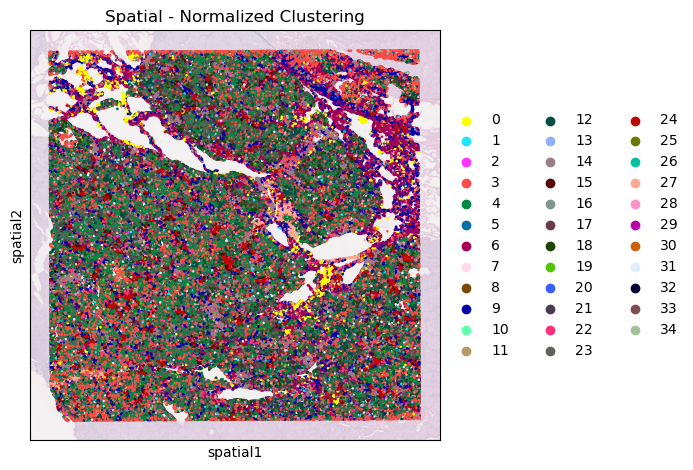

In [ ]:
# Normalize & cluster
adata_norm = adata_cells.copy()
sc.pp.normalize_total(adata_norm, target_sum=1e4) # scales the total UMI counts per cell to a fixed value 
sc.pp.log1p(adata_norm) # Makes expression more Gaussian-like
sc.pp.highly_variable_genes(adata_norm, n_top_genes=2000, subset=True) # Focus analysis on informative genes
sc.pp.scale(adata_norm) # Zero-mean, unit-variance transformation

sc.tl.pca(adata_norm, svd_solver='arpack')
sc.pp.neighbors(adata_norm, n_neighbors=30, n_pcs=30)
sc.tl.leiden(adata_norm, resolution=1, key_added='leiden_norm', flavor="igraph", n_iterations=2)
sc.tl.umap(adata_norm)

adata_raw = adata_cells.copy()

fig, axs = plt.subplots(figsize=(12, 5))
sc.pl.umap(adata_norm, color='leiden_norm',  title='Normalized Expression (log1p)', show=False)
plt.show()



# Plotting Spatial views
sc.pl.spatial(adata_norm, 
              color='leiden_norm', 
              basis='spatial', 
              img_key='hires',
              alpha_img=0.3, 
              alpha=1, 
              spot_size=100,
              cmap = 'jet',
              title='Spatial - Normalized Clustering', 
              show=False)

plt.tight_layout()
plt.show()

import scanpy as sc
import pandas as pd
import celltypist

# Step 1: Load model from cache or download if not present
model_IAH = celltypist.models.Model.load(model='Immune_All_High.pkl')

# Prepare the data for CellTypist (log1p normalized to 10,000 counts per cell)
adata_norm = adata_cells.copy()
sc.pp.normalize_total(adata_norm, target_sum=1e4) # scales the total UMI counts per cell to a fixed value 
sc.pp.log1p(adata_norm) # Makes expression more Gaussian-like
sc.pp.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=30)  # adjust these
sc.tl.leiden(adata, resolution=1)

# Step 2: Annotate the full dataset using CellTypist
predictions = celltypist.annotate(adata_norm, model=model_IAH, majority_voting=True)
adata_IAH = predictions.to_adata()
sc.tl.umap(adata_IAH)


sc.pl.umap(adata_IAH, color = ['predicted_labels'])
sc.pl.umap(adata_IAH, color = ['majority_voting'])

# Plotting Spatial views
sc.pl.spatial(adata_IAH, color='majority_voting',
              basis='spatial', 
              img_key='hires',
              alpha_img=0.3, alpha=.7, spot_size=55,
              cmap = 'jet',
              title='', 
              show=True)


sc.pl.spatial(adata_IAH, color='predicted_labels',
              basis='spatial', 
              img_key='hires',
              alpha_img=0.3, alpha=.7, spot_size=55,
              cmap = 'jet',
              title='', 
              show=True)

